In [1]:
import io, os, sys, types
from nbformat import read
%run ./lib/init.ipynb
initfunc()

C:\Users\masa.tseng\AppData\Local\Temp\ipykernel_22920\1254987030.py:10: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [2]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
import math

In [3]:
q3 = QuantumRegister(3)

In [208]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.visualization import plot_histogram

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
aer_sim = Aer.get_backend('aer_simulator')
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.cz(qreg_q[1], qreg_q[2])
circuit.cz(qreg_q[0], qreg_q[1])
circuit.cz(qreg_q[0], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
#針對第一顆 做x measure
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0],0)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

#針對第二顆 做z measure
#circuit.h(qreg_q[1])
circuit.measure(qreg_q[1],1)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

#針對第三顆 做z measure
#circuit.h(qreg_q[2])
circuit.measure(qreg_q[2],2)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

print("---- 第一顆進行 x measure ----")
print(circuit.draw())

qobj = assemble(circuit, shots=2048, memory=True)
result = aer_sim.run(qobj).result()
measured_bit = result.get_memory()
counts = result.get_counts()
print(counts)

#針對第一顆 做x measure
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0],0)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])


#針對第二顆 做z measure
#circuit.h(qreg_q[1])
circuit.measure(qreg_q[1],1)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

#針對第三顆 做z measure
#circuit.h(qreg_q[2])
circuit.measure(qreg_q[2],2)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

print("---- 第一顆進行 x measure ----")
print(circuit.draw())



#qobj = assemble(circuit, shots=2048, memory=True)
result = aer_sim.run(qobj).result()
measured_bit = result.get_memory()
counts = result.get_counts()
print(counts)
#print(measured_bit)


# simulator = Aer.get_backend('qasm_simulator')
# job = execute(circuit, simulator)
# result = job.result()
# counts = result.get_counts()
# print(counts)


#ax0(counts)


---- 第一顆進行 x measure ----
     ┌───┐          ░ ┌───┐┌─┐ ░     ░     ░ 
q_0: ┤ H ├────■──■──░─┤ H ├┤M├─░─────░─────░─
     ├───┤    │  │  ░ └───┘└╥┘ ░ ┌─┐ ░     ░ 
q_1: ┤ H ├─■──■──┼──░───────╫──░─┤M├─░─────░─
     ├───┤ │     │  ░       ║  ░ └╥┘ ░ ┌─┐ ░ 
q_2: ┤ H ├─■─────■──░───────╫──░──╫──░─┤M├─░─
     └───┘          ░       ║  ░  ║  ░ └╥┘ ░ 
c: 3/═══════════════════════╩═════╩═════╩════
                            0     1     2    
{'101': 490, '011': 541, '000': 517, '110': 500}
---- 第一顆進行 x measure ----
     ┌───┐          ░ ┌───┐┌─┐ ░     ░     ░ ┌───┐┌─┐ ░          ░     ░ 
q_0: ┤ H ├────■──■──░─┤ H ├┤M├─░─────░─────░─┤ H ├┤M├─░──────────░─────░─
     ├───┤    │  │  ░ └───┘└╥┘ ░ ┌─┐ ░     ░ └───┘└╥┘ ░ ┌───┐┌─┐ ░     ░ 
q_1: ┤ H ├─■──■──┼──░───────╫──░─┤M├─░─────░───────╫──░─┤ H ├┤M├─░─────░─
     ├───┤ │     │  ░       ║  ░ └╥┘ ░ ┌─┐ ░       ║  ░ └───┘└╥┘ ░ ┌─┐ ░ 
q_2: ┤ H ├─■─────■──░───────╫──░──╫──░─┤M├─░───────╫──░───────╫──░─┤M├─░─
     └───┘          ░       ║  ░  ║  ░ └╥

     ┌───┐          ░ ┌───┐┌─┐ ░     ░     ░ ┌─┐ ░          ░     ░ 
q_0: ┤ H ├────■──■──░─┤ H ├┤M├─░─────░─────░─┤M├─░──────────░─────░─
     ├───┤    │  │  ░ └───┘└╥┘ ░ ┌─┐ ░     ░ └╥┘ ░ ┌───┐┌─┐ ░     ░ 
q_1: ┤ H ├─■──■──┼──░───────╫──░─┤M├─░─────░──╫──░─┤ Z ├┤M├─░─────░─
     ├───┤ │     │  ░       ║  ░ └╥┘ ░ ┌─┐ ░  ║  ░ └───┘└╥┘ ░ ┌─┐ ░ 
q_2: ┤ H ├─■─────■──░───────╫──░──╫──░─┤M├─░──╫──░───────╫──░─┤M├─░─
     └───┘          ░       ║  ░  ║  ░ └╥┘ ░  ║  ░       ║  ░ └╥┘ ░ 
c: 3/═══════════════════════╩═════╩═════╩═════╩══════════╩═════╩════
                            0     1     2     0          1     2    
{'101': 530, '110': 518, '011': 502, '000': 498}


In [5]:
from numpy.random import randint
import numpy as np
np.random.seed(seed=0)
n = 8
## Step 1
#Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
print(alice_bases)

[1 1 1 0 0 1 0 0]


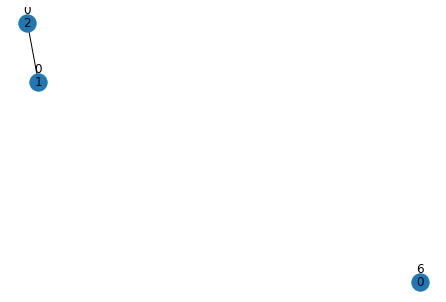

Counter({'00': 261, '10': 250, '11': 245, '01': 244})


In [6]:
from __init__ import GraphState
from collections import Counter

results = []
for i in range(1000):
  g = GraphState(3)
  g.h(0)
  g.h(1)
  g.h(2)
  g.cz(0, 1)
  g.cz(0, 2)
  #g.cz(1, 2)
  g.measure(0,'Y')

  if i == 0:
    g.draw()

  results.append(str(g.measure(1)) + str(g.measure(2)))

print(Counter(results))